In [1]:
!pip install pynytimes --quiet
# https://github.com/michadenheijer/pynytimes

In [2]:
from pynytimes import NYTAPI
import pandas as pd
import glob
from ast import literal_eval
import matplotlib.pyplot as plt
plt.style.use('dark_background')
pd.options.display.max_colwidth = 100
import nltk
from nltk.corpus import stopwords
from datetime import datetime, timedelta

In [3]:
nyt = NYTAPI("a03qiFO9FwyMSp0po7kHavUoCNGTXpmY", parse_dates=True)

In [4]:
from datetime import datetime, timedelta
import pandas as pd

# Calculate the start and end date (past 100 days)
start_date = (datetime.today() - timedelta(days=100)).date()
end_date = datetime.today().date()

# Define multiple queries related to Tariffs
articles = nyt.article_search(
    query=" OR ".join(["Tariffs", "Trade Policy", "Import Tax", "Trade War"]),
    dates={"begin": start_date, "end": end_date},
    results=10
)

# Convert to DataFrame
df = pd.DataFrame(articles)

# Display DataFrame info to confirm data is collected
print(df.info())
print(df.head())  # Show first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   abstract          10 non-null     object             
 1   web_url           10 non-null     object             
 2   snippet           10 non-null     object             
 3   lead_paragraph    10 non-null     object             
 4   print_section     8 non-null      object             
 5   print_page        8 non-null      object             
 6   source            10 non-null     object             
 7   multimedia        10 non-null     object             
 8   headline          10 non-null     object             
 9   keywords          10 non-null     object             
 10  pub_date          10 non-null     datetime64[ns, UTC]
 11  document_type     10 non-null     object             
 12  news_desk         10 non-null     object             
 13  section_

In [5]:
print(len(articles))  # Check how many articles were retrieved

10


In [6]:
#most_viewed = nyt.most_viewed(days = 30)
#df = pd.DataFrame.from_dict(most_viewed)

In [7]:
df.head()
df.to_csv('currentarticles.csv')

In [8]:
print(df.columns)

Index(['abstract', 'web_url', 'snippet', 'lead_paragraph', 'print_section',
       'print_page', 'source', 'multimedia', 'headline', 'keywords',
       'pub_date', 'document_type', 'news_desk', 'section_name', 'byline',
       'type_of_material', '_id', 'word_count', 'uri', 'subsection_name'],
      dtype='object')


In [9]:
keyword_counts = pd.Series(
    x['value'].lower() for l in df['keywords'] if isinstance(l, list) for x in l
).value_counts(ascending=False)

keyword_counts = keyword_counts[keyword_counts >= 2]
print(keyword_counts)

customs (tariff)                         10
protectionism (trade)                     9
international trade and world market      9
trump, donald j                           9
canada                                    7
china                                     6
mexico                                    6
united states international relations     5
united states economy                     5
executive orders and memorandums          5
united states politics and government     4
united states                             3
prices (fares, fees and rates)            3
inflation (economics)                     2
europe                                    2
european union                            2
illegal immigration                       2
world trade organization                  2
united states-mexico-canada agreement     2
Name: count, dtype: int64


In [10]:
keyword_counts.head(25)

customs (tariff)                         10
protectionism (trade)                     9
international trade and world market      9
trump, donald j                           9
canada                                    7
china                                     6
mexico                                    6
united states international relations     5
united states economy                     5
executive orders and memorandums          5
united states politics and government     4
united states                             3
prices (fares, fees and rates)            3
inflation (economics)                     2
europe                                    2
european union                            2
illegal immigration                       2
world trade organization                  2
united states-mexico-canada agreement     2
Name: count, dtype: int64

In [11]:
#pd_keywords = keyword_counts.to_frame()

pd_keywords = pd.DataFrame({'keywords':keyword_counts.index, 'frequencies':keyword_counts.values})

In [12]:
pd_keywords.head()

,keywords,frequencies
0,customs (tariff),10
1,protectionism (trade),9
2,international trade and world market,9
3,"trump, donald j",9
4,canada,7


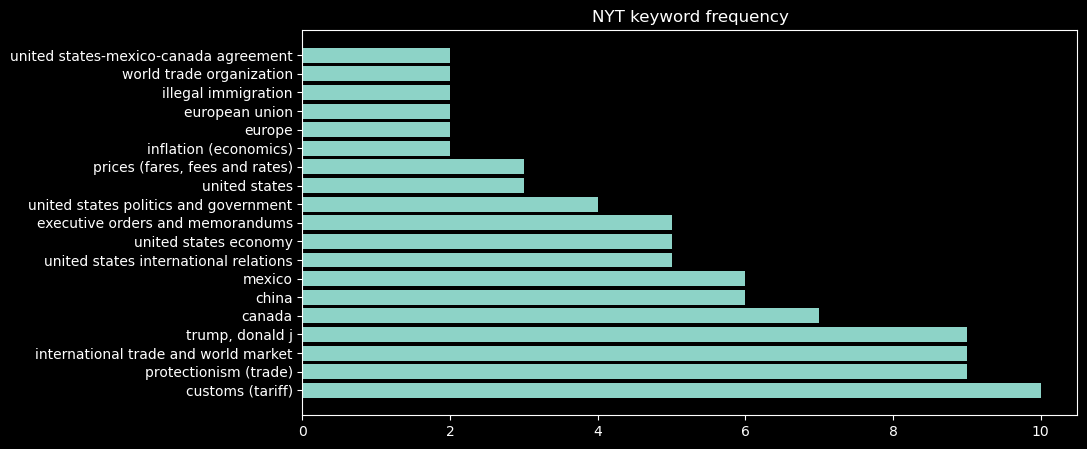

In [13]:
#keyword_counts_list = list(keyword_counts.keys())
#frequencies = []
#for keyword in deaf_keywords:
#    index = keyword_counts_list.index(keyword)
#    frequencies.append(keyword_counts.iloc[index])
    
plt.figure(figsize=(10, 5))
plt.barh(pd_keywords['keywords'], pd_keywords['frequencies'])
plt.title('NYT keyword frequency')
plt.show()